# Multiple linear regression

## Data Information

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [8]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [10]:
df = df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']]

In [11]:
df.head()

,Hours_Studied,Attendance,Previous_Scores,Exam_Score
0,23,84,73,67
1,19,64,59,61
2,24,98,91,74
3,29,89,98,71
4,19,92,65,70


In [12]:
df.isnull().sum()

Hours_Studied      0
Attendance         0
Previous_Scores    0
Exam_Score         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Hours_Studied    6607 non-null   int64
 1   Attendance       6607 non-null   int64
 2   Previous_Scores  6607 non-null   int64
 3   Exam_Score       6607 non-null   int64
dtypes: int64(4)
memory usage: 206.6 KB


In [14]:
df.describe()

,Hours_Studied,Attendance,Previous_Scores,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,75.070531,67.235659
std,5.990594,11.547475,14.399784,3.890456
min,1.000000,60.000000,50.000000,55.000000
25%,16.000000,70.000000,63.000000,65.000000
50%,20.000000,80.000000,75.000000,67.000000
75%,24.000000,90.000000,88.000000,69.000000
max,44.000000,100.000000,100.000000,101.000000


## Data Visualisation

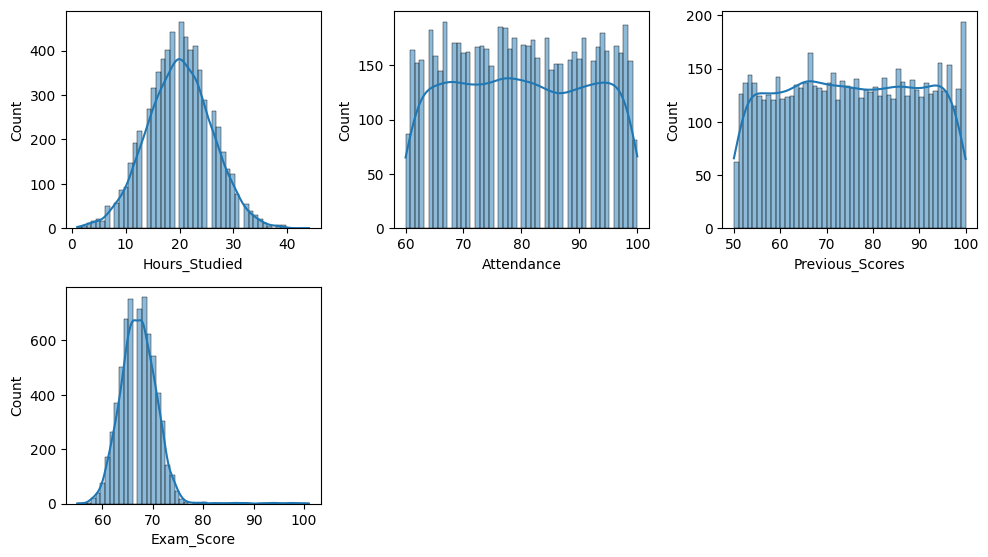

In [16]:
plt.figure(figsize=(10, 8))
cols = df.columns.to_list()
for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(
        df,
        x=col,
        kde = True,
        bins = 50
    )

plt.tight_layout()
plt.show()

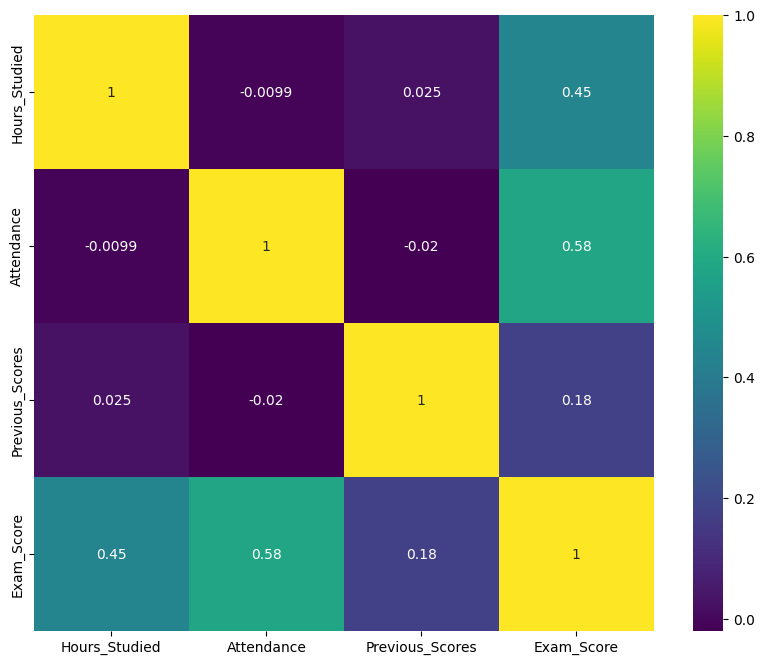

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

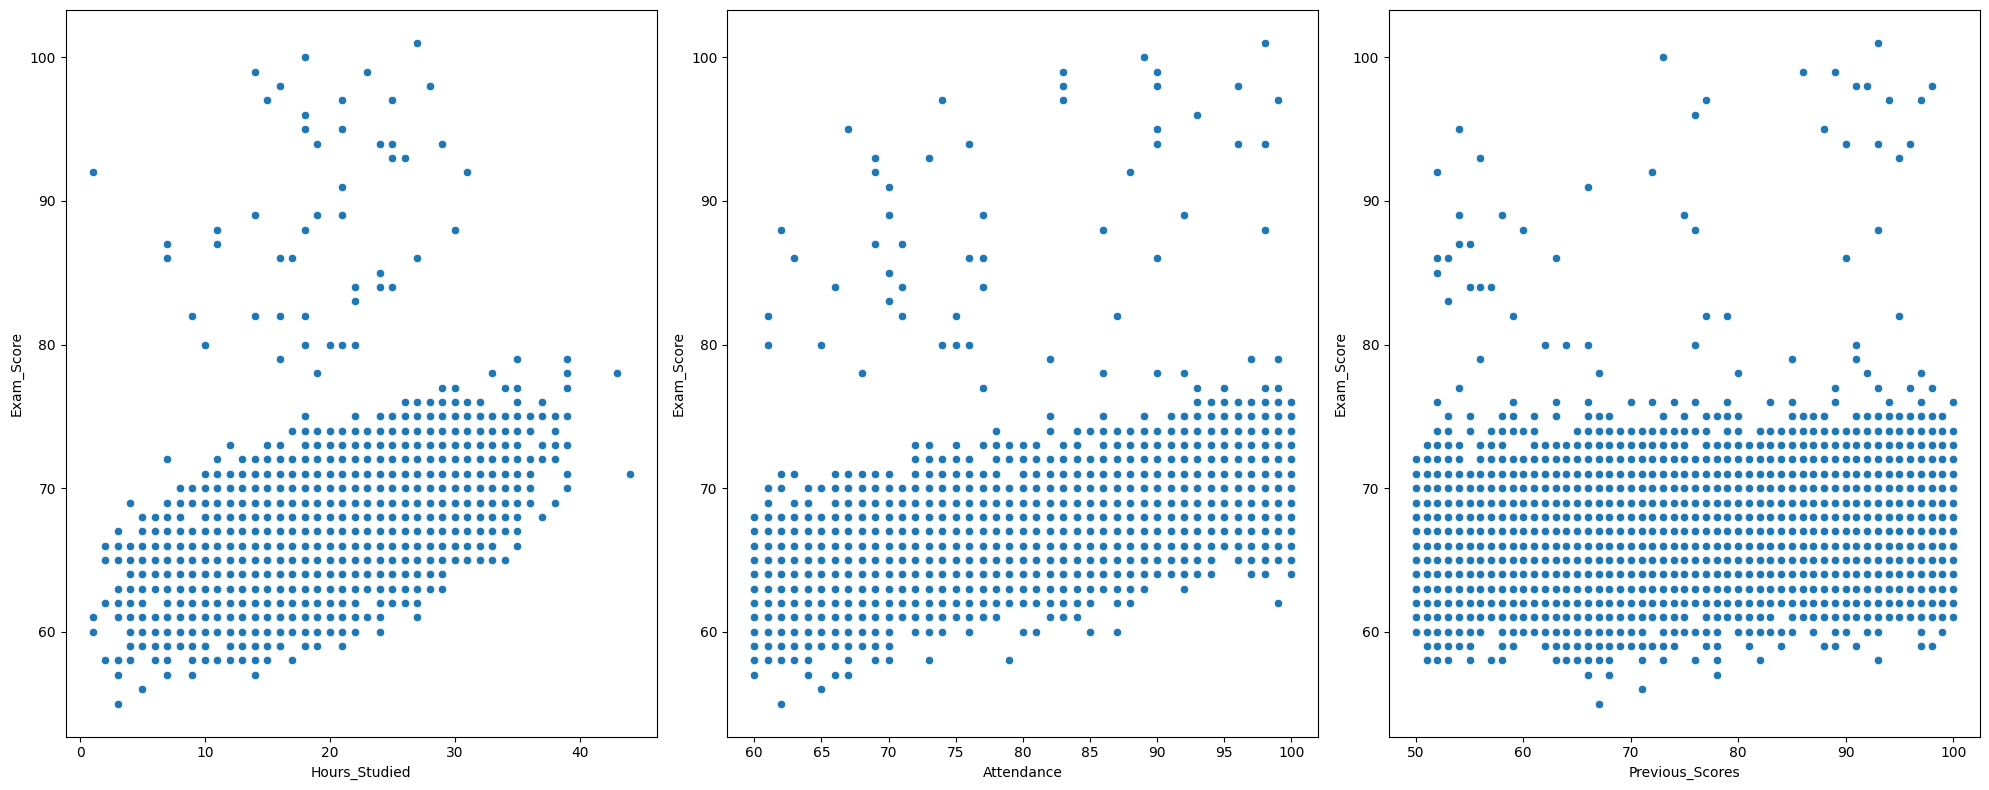

In [19]:
plt.figure(figsize=(20, 8))
cols = df.columns.to_list()
cols.remove('Exam_Score')
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(
        df,
        x = col,
        y = 'Exam_Score'
    )

plt.tight_layout()
plt.show()

## Multiple Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [21]:
X = df.drop('Exam_Score', axis = 1)  
y = df['Exam_Score']  

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

X_train[['Hours_Studied']] = std_scaler.fit_transform(X_train[['Hours_Studied']]) # Uniform
X_test[['Hours_Studied']] = std_scaler.transform(X_test[['Hours_Studied']])
X_train[['Attendance', 'Previous_Scores']] = minmax_scaler.fit_transform(X_train[['Attendance', 'Previous_Scores']]) # Gaussian
X_test[['Attendance', 'Previous_Scores']] = minmax_scaler.transform(X_test[['Attendance', 'Previous_Scores']])

y_train = std_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = std_scaler.transform(y_test.values.reshape(-1, 1))

In [24]:
len(X_train), len(X_test), len(y_train), len(y_test)

(5285, 1322, 5285, 1322)

In [25]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lm.predict(X_test)

In [28]:
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f} \nMSE: {mse:.2f} \nMAE: {mae:.2f} \nR2: {r2:.2f}')

RMSE: 0.59 
MSE: 0.35 
MAE: 0.35 
R2: 0.62


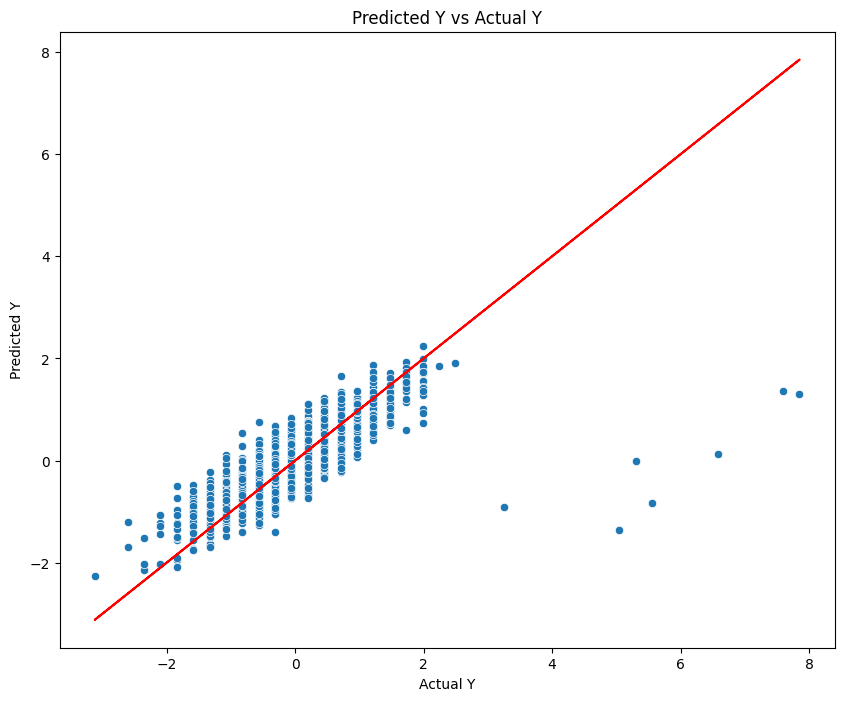

In [29]:
# Predicted Y vs Actual Y
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test.reshape(-1,), y=y_pred.reshape(-1,), linewidth=0.5)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Predicted Y vs Actual Y')
plt.show()

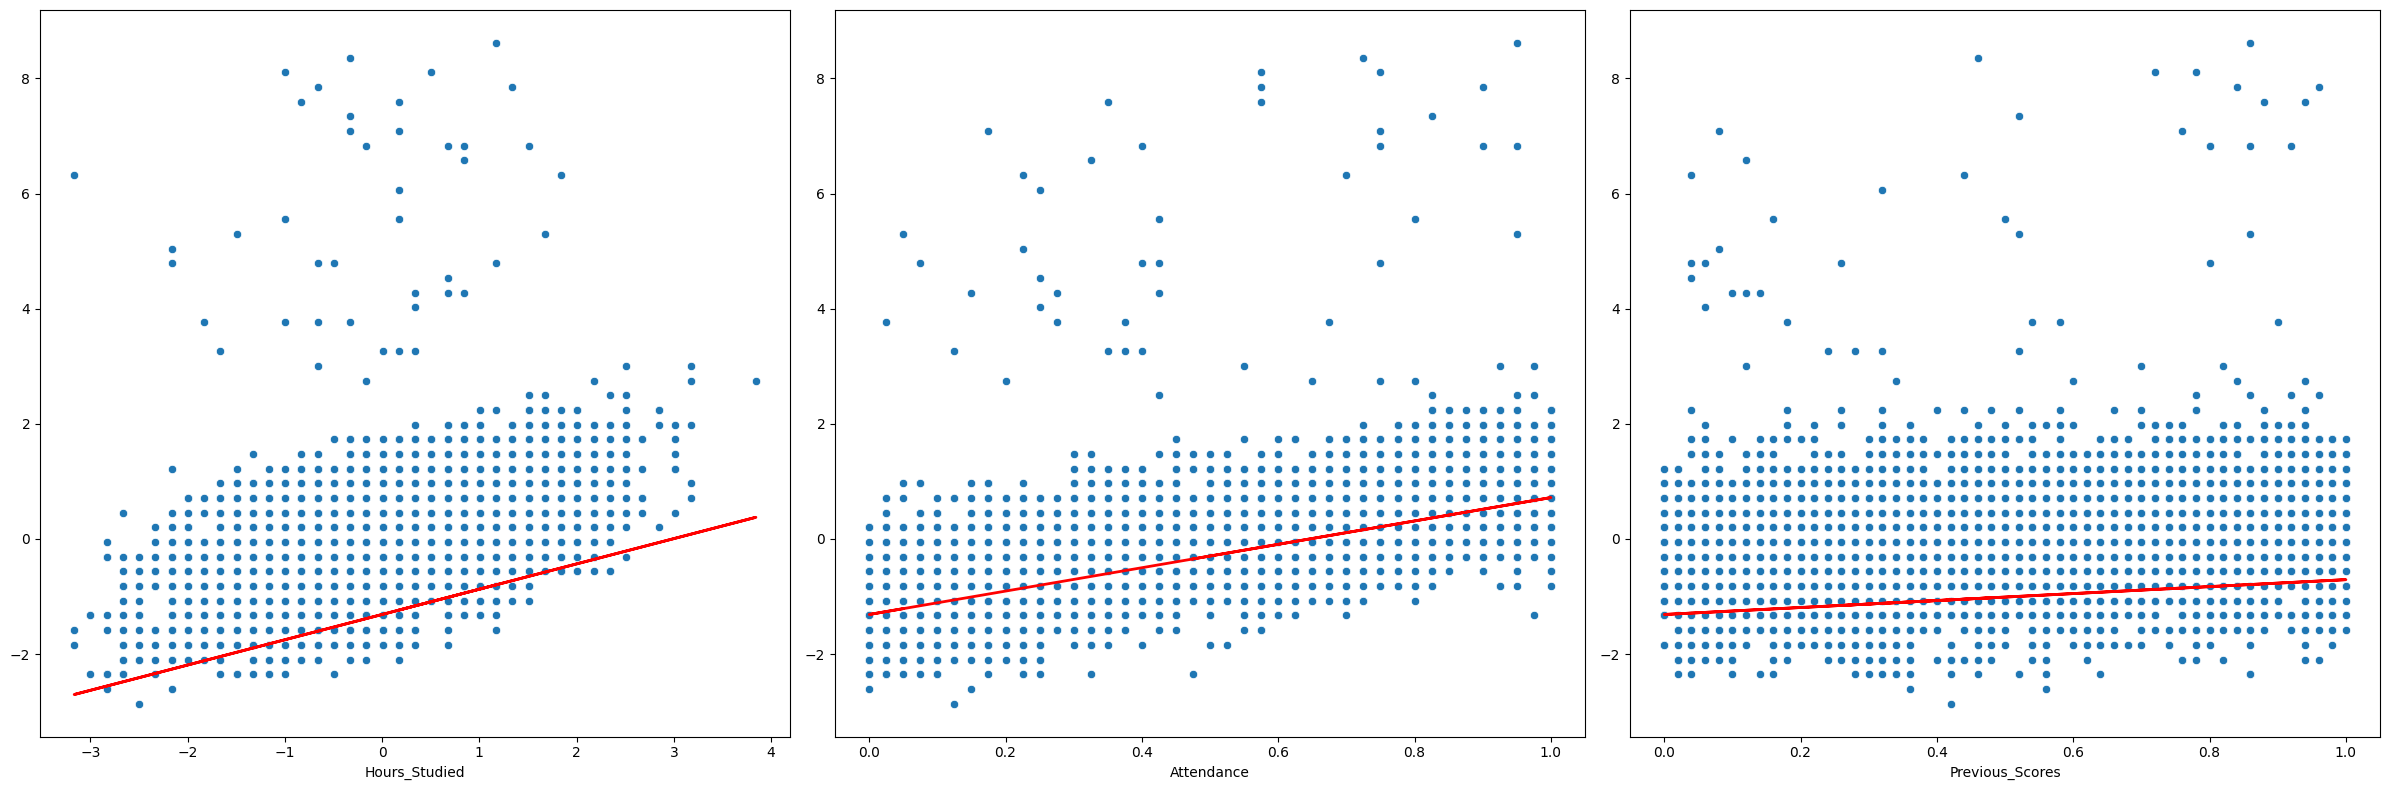

In [ ]:
# Model coeffcients and intercept
intercept = lm.intercept_
plt.figure(figsize=(24, 8))
cols = X_train.columns.to_list()
for i, col in enumerate(cols):
    c = lm.coef_[0][i]
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x = X_train[col], y = y_train.flatten(), linewidth = 0.5)
    plt.plot(X_train[col], c*X_train[col] + intercept, color='red', linewidth = 2)

plt.tight_layout()
plt.show()